# Exploratory data analysis

Start by investigating dataset:

* load data
* check missing values
* check correlation against target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from constants import TARGET, NON_MODELING_FEATURES

sns.set()
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Basic data check

Load data and check features

In [2]:
# Load data
df = pd.read_csv('data/games.csv')

In [3]:
# Check first rows of data
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18


## Missing values

Check if there are any missing values in the data

In [4]:
# Missing values
df.isna().sum()

gameId                0
creationTime          0
gameDuration          0
seasonId              0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_champ1id           0
t1_champ1_sum1        0
t1_champ1_sum2        0
t1_champ2id           0
t1_champ2_sum1        0
t1_champ2_sum2        0
t1_champ3id           0
t1_champ3_sum1        0
t1_champ3_sum2        0
t1_champ4id           0
t1_champ4_sum1        0
t1_champ4_sum2        0
t1_champ5id           0
t1_champ5_sum1        0
t1_champ5_sum2        0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t1_ban1               0
t1_ban2               0
t1_ban3               0
t1_ban4               0
t1_ban5               0
t2_champ1id           0
t2_champ1_sum1        0
t2_champ1_sum2        0
t2_champ2id           0
t2_champ2_sum1        0
t2_champ2_sum2  

There are no missing values!

## Data types

Check the datatypes of features in data. For categorical/integer features, check cardinality

In [5]:
# Dtypes in data
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [6]:
# Cardinality of categorical/integer features
for arr in df.select_dtypes(['category', 'int']):
    print(arr)
    print(df[arr].value_counts())

gameId
3330058394    3
3327686351    3
3327789705    3
3331389685    3
3327943548    3
             ..
3329787792    1
3326395443    1
3327354242    1
3292437629    1
3317333020    1
Name: gameId, Length: 51053, dtype: int64
creationTime
1504555918682    3
1504634667164    3
1504646045817    3
1504394875640    3
1504380431622    3
                ..
1501688260381    1
1504540839329    1
1504296291006    1
1504360213896    1
1503612754059    1
Name: creationTime, Length: 51052, dtype: int64
gameDuration
196     128
197     109
194     103
195      97
198      82
       ... 
2971      1
903       1
3484      1
3852      1
3304      1
Name: gameDuration, Length: 2590, dtype: int64
seasonId
9    51490
Name: seasonId, dtype: int64
winner
1    26077
2    25413
Name: winner, dtype: int64
firstBlood
1    26113
2    24822
0      555
Name: firstBlood, dtype: int64
firstTower
1    25861
2    24416
0     1213
Name: firstTower, dtype: int64
firstInhibitor
1    23054
2    22160
0     6276
Name: firs

The level of cardinality varies between features. Some are of a cardinality where we can do one-hot encoding (without exploding the feature space) but for the rest target encoding might be a better approach to maintain dimensionality.

### Duplicate rows

It seems `gameId` has duplicated values. Let's have a look at `gameId == 3330058394`

In [7]:
df.loc[df['gameId'] == 3330058394]

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
10705,3330058394,1504555918682,2239,9,1,2,2,2,1,1,0,203,4,11,18,7,4,58,4,14,96,4,12,53,4,14,9,1,1,3,0,154,37,57,122,40,29,4,11,117,4,12,412,4,3,81,4,7,61,4,14,8,1,0,0,0,157,11,56,22,103
13249,3330058394,1504555918682,2239,9,1,2,2,2,1,1,0,203,4,11,18,7,4,58,4,14,96,4,12,53,4,14,9,1,1,3,0,154,37,57,122,40,29,4,11,117,4,12,412,4,3,81,4,7,61,4,14,8,1,0,0,0,157,11,56,22,103
45912,3330058394,1504555918682,2239,9,1,2,2,2,1,1,0,203,4,11,18,7,4,58,4,14,96,4,12,53,4,14,9,1,1,3,0,154,37,57,122,40,29,4,11,117,4,12,412,4,3,81,4,7,61,4,14,8,1,0,0,0,157,11,56,22,103


These are duplicates. Let's dedupe data before doing more exploration.

In [8]:
# Dedupe data
df_dedupe = df.drop_duplicates()

# Print shapes
print(f'Shape of original data: {df.shape}')
print(f'Shape of deduped data: {df_dedupe.shape}')

Shape of original data: (51490, 61)
Shape of deduped data: (51053, 61)


### Encoding approach

Let's define an initial encoding approach for the different features

In [9]:
# Extract column names
cols = df_dedupe.select_dtypes(['category', 'int']).columns.to_list()

In [10]:
# Divide features in to high respectively low cardinality
high_car = []
low_car = []

for col in cols:
    if col in [TARGET] + NON_MODELING_FEATURES:
        continue
    if len(df_dedupe[col].value_counts()) > 20:
        high_car.append(col)
    else:
        low_car.append(col)

In [11]:
print(f'Nr features with high cardinality: {len(high_car)}')
print(f'Nr features with low cardinality: {len(low_car)}')

Nr features with high cardinality: 21
Nr features with low cardinality: 36


## Correlation against target

Check different features correlation against the target feature

In [12]:
# Correlation between features, sample 10,000 rows
cor = df_dedupe.sample(10000).corr()

In [13]:
# Get the absolute value of the correlation
cor_target = abs(cor[TARGET])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items() if index not in NON_MODELING_FEATURES]

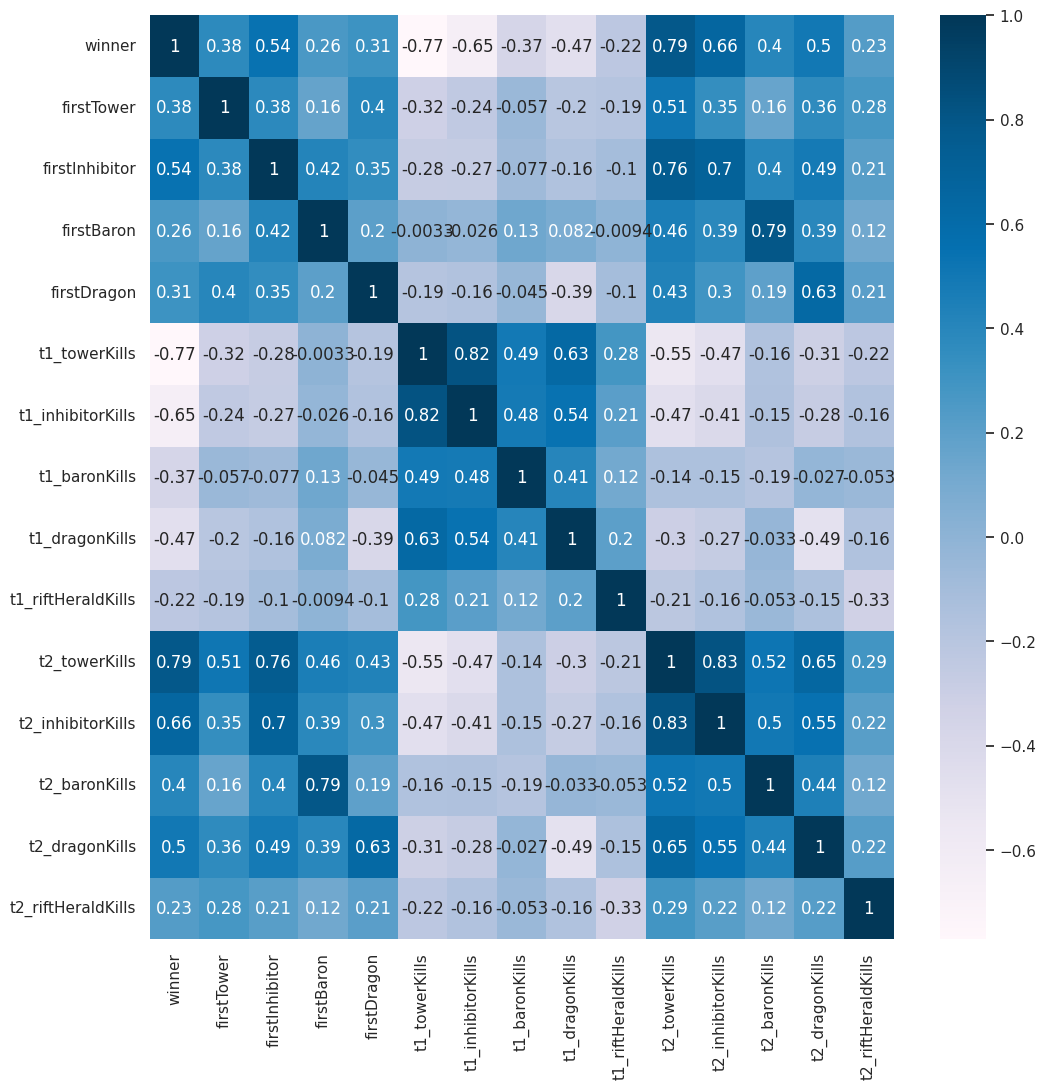

In [14]:
# Set figure size
plt.figure(figsize=(12,12))

# Calculate correlation matrix
cor = df_dedupe[names].corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [19]:
df_dedupe[names].tail(10)

,winner,firstTower,firstInhibitor,firstBaron,firstDragon,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
51480,2,2,2,2,1,0,0,0,2,0,10,2,1,1,1
51481,1,1,2,1,2,9,1,1,2,0,9,2,1,2,0
51482,2,1,2,2,2,5,0,0,0,1,11,6,3,5,0
51483,2,1,2,2,1,2,0,0,1,0,10,2,1,1,0
51484,2,1,2,2,2,5,1,0,2,0,11,5,2,3,0
51485,2,2,2,0,2,2,0,0,0,0,10,2,0,4,0
51486,2,1,2,2,2,5,4,0,2,0,11,7,4,4,1
51487,2,2,2,0,1,0,0,0,1,0,10,2,0,2,0
51488,2,2,2,0,2,0,0,0,0,0,11,3,0,1,0
51489,1,1,1,1,2,11,3,1,2,0,1,0,0,1,0


## Export data

From the above EDA we conclude that there are duplicate rows in the raw data which we shouldn't model on. Additionaly, we have some features which have a significant correlation against the target and features with high and low cardinality.

Let's export all of these.

In [15]:
# Export deduped dataset as csv
df_dedupe.to_csv('data/games_deduped.csv', index=False)

In [16]:
# Export names of features with significant correlation against target
data_path = 'data/names.json'
with open(data_path, 'w') as file:
    json.dump(names, file)

In [17]:
# Export high and low cardinality features
d = dict()
d['high_cardinality'] = high_car
d['low_cardinality'] = low_car

data_path = 'data/cardinality_features.json'
with open(data_path, 'w') as file:
    json.dump(d, file)